In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [258]:
def sigmoid(h):
    return 1 / (1 + np.exp(-h))

def cross_entropy(y,p):
    return -np.sum(y*np.log(p) + (1 - y)*np.log(1 - p))
def accuracy(y, p):
    return np.mean(y == np.round(p))

In [259]:
df = pd.read_csv("./xor.csv")

In [260]:
X= df[['x1','x2']]

y = np.array([0]*int(len(X)/2) + [1]*int(len(X)/2))


#X = np.hstack((np.ones((X.shape[0],1)), X))

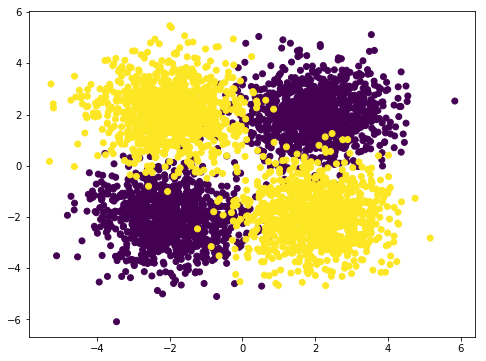

In [261]:
plt.figure(figsize=(8,6))
plt.scatter(X['x1'], X['x2'], c = y)

In [262]:
PHI = np.vstack([np.array([1]*(X.shape[0])), X.T]).T


In [263]:
cx =  PHI[:,1]*PHI[:,2]

PHI = np.c_[PHI, cx]

PHI

array([[ 1.        ,  1.90756726,  0.32586513,  0.62160966],
       [ 1.        ,  2.27054368,  2.25881652,  5.12874156],
       [ 1.        ,  2.32308573,  1.46660143,  3.40704085],
       ...,
       [ 1.        ,  3.0596909 , -2.87353245, -8.79212109],
       [ 1.        ,  3.52560718, -2.33106954, -8.21843551],
       [ 1.        ,  1.72005898, -1.13464011, -1.9516479 ]])

In [264]:
PHI[:,1] = 1/ PHI[:,1]
PHI[:,2] = 1/ PHI[:,2]
#PHI[:,2] = PHI[:,1]*PHI[:,2]
PHI

array([[ 1.        ,  0.52422791,  3.06875422,  0.62160966],
       [ 1.        ,  0.44042315,  0.44270971,  5.12874156],
       [ 1.        ,  0.43046195,  0.68184851,  3.40704085],
       ...,
       [ 1.        ,  0.3268304 , -0.34800373, -8.79212109],
       [ 1.        ,  0.28363909, -0.42898763, -8.21843551],
       [ 1.        ,  0.58137541, -0.88133673, -1.9516479 ]])

C:\Users\Consultants\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\Consultants\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


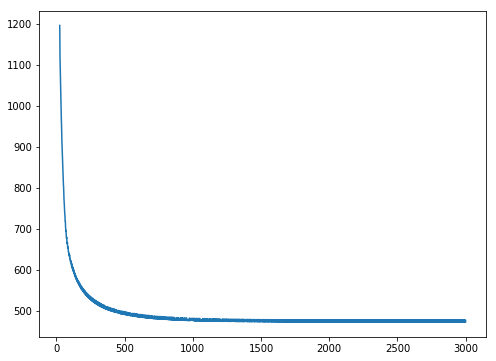

In [265]:
w = np.random.randn(PHI.shape[1])
J = []
eta = 1e-5
epochs = 3000

for t in range(epochs):
    p = sigmoid(PHI.dot(w))
    J.append(cross_entropy(y, p))
    w -= eta*PHI.T.dot(p - y)
    
plt.figure(figsize = (8,6))
plt.plot(J)

In [266]:
accuracy(y, p)

0.958

In [ ]:



plt.figure(figsize=(8,6))
plt.scatter(X['x1'], X['x2'], c = y)

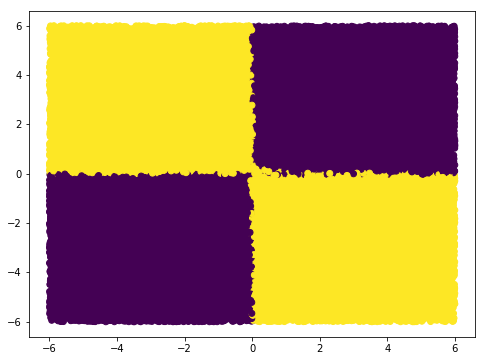

In [273]:
# Visualize the Learned Decision Boundary

X_vis = np.random.uniform(-6, 6, (int(10*X.shape[0]),X.shape[1]))

PHI_vis = np.vstack((np.ones(len(X_vis)), 1/X_vis[:,0], 1/X_vis[:,1],X_vis[:,0]*X_vis[:,1])).T

p_vis = sigmoid(PHI_vis.dot(w))

plt.figure(figsize = (8,6))
plt.scatter(X_vis[:,0],X_vis[:,1], c = np.round(p_vis))